In [1]:
import pandas as pd

# CSV dosyasını yükleyelim
file_path = 'stemmed_data.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()

,name,stemmed_text
0,Breakfast for the lazy,"['put', 'cottag', 'chees', 'wide', 'bowl', 'ad..."
1,Breek breakfast,"['rins', 'buckwheat', 'pour', 'cup', 'boil', '..."
2,Childhood breakfast,"['grate', 'carrot', 'green', 'appl', 'middl', ..."
3,French croutons for breakfast,"['mix', 'egg', 'milksaltdip', 'piec', 'loaf', ..."
4,Low -calorie breakfast,"['boil', 'egg', 'boiledcut', 'chees', 'tomatoe..."


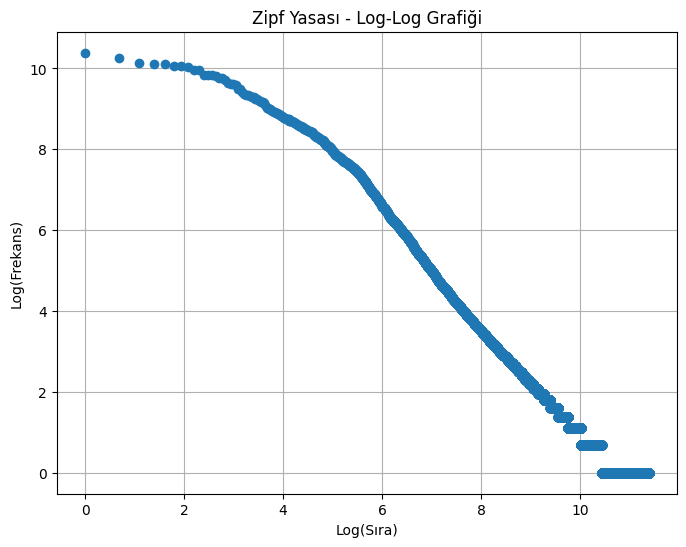

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# CSV dosyasını yükleyelim
file_path = "stemmed_data.csv"
df = pd.read_csv(file_path)

# 'stemmed_text' sütunundaki kelimeleri liste olarak alalım
text_column = df['stemmed_text'].dropna()

# Liste içindeki kelimeleri birleştirerek metin haline getirelim
words = [word for row in text_column for word in eval(row)]  # Eğer veriler string olarak saklanmışsa eval() kullan

# Kelime frekanslarını say
word_counts = Counter(words)

# Kelime frekanslarını azalan sıraya göre sıralayın
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Kelimeleri ve frekansları ayır
words, freqs = zip(*sorted_word_counts)

# Log-log grafiğini oluşturma
plt.figure(figsize=(8, 6))

# Kelime frekanslarının logaritmasını ve sıralamasını al
log_freqs = np.log(freqs)
log_ranks = np.log(range(1, len(freqs) + 1))

plt.plot(log_ranks, log_freqs, marker='o', linestyle='None')

# Grafik başlığı ve etiketler
plt.title("Zipf Yasası - Log-Log Grafiği")
plt.xlabel("Log(Sıra)")
plt.ylabel("Log(Frekans)")

# Grafiği göster
plt.grid(True)
plt.show()


In [10]:
print(f"Veri çerçevesi boyutu: {df.shape}")  # (satır sayısı, sütun sayısı)


Veri çerçevesi boyutu: (37637, 2)


In [11]:
unique_words = set(words)
print(f"Toplam kelime sayısı: {len(words)}")
print(f"Eşsiz kelime sayısı: {len(unique_words)}")


Toplam kelime sayısı: 87748
Eşsiz kelime sayısı: 87748


In [13]:
initial_rows = len(df)
df_cleaned = df.dropna(subset=['stemmed_text'])  # Boş satırları sil
final_rows = len(df_cleaned)

print(f"Başlangıçtaki veri satırı: {initial_rows}")
print(f"Temizlenmiş veri satırı: {final_rows}")
print(f"Elenen satır sayısı: {initial_rows - final_rows}")


Başlangıçtaki veri satırı: 37637
Temizlenmiş veri satırı: 37637
Elenen satır sayısı: 0
